# Practical Application III: Comparing Classifiers

**Overview**: In this practical application, your goal is to compare the performance of the classifiers we encountered in this section, namely K Nearest Neighbor, Logistic Regression, Decision Trees, and Support Vector Machines.  We will utilize a dataset related to marketing bank products over the telephone.  



## Getting Started

Our dataset comes from the UCI Machine Learning repository [link](https://archive.ics.uci.edu/ml/datasets/bank+marketing).  The data is from a Portugese banking institution and is a collection of the results of multiple marketing campaigns.  We will make use of the article accompanying the dataset [here](CRISP-DM-BANK.pdf) for more information on the data and features.



## Problem 1: Understanding the Data

To gain a better understanding of the data, please read the information provided in the UCI link above, and examine the **Materials and Methods** section of the paper.  How many marketing campaigns does this data represent?

#### Answer: 17 campaigns

## Problem 2: Read in the Data

Use pandas to read in the dataset `bank-additional-full.csv` and assign to a meaningful variable name.

In [560]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import make_column_selector
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
from sklearn.dummy import DummyClassifier

In [562]:
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeClassifier, export_text, plot_tree
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
import time

In [564]:
pd.options.display.max_columns = None

In [566]:
df = pd.read_csv('data/bank-additional-full.csv', sep = ';')

In [568]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,149,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,226,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,151,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,307,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [570]:
df

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,149,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,226,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,151,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,307,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,334,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,383,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,189,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,442,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes


## Problem 3: Understanding the Features


Examine the data description below, and determine if any of the features are missing values or need to be coerced to a different data type.


```
Input variables:
# bank client data:
1 - age (numeric)
2 - job : type of job (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')
3 - marital : marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)
4 - education (categorical: 'basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown')
5 - default: has credit in default? (categorical: 'no','yes','unknown')
6 - housing: has housing loan? (categorical: 'no','yes','unknown')
7 - loan: has personal loan? (categorical: 'no','yes','unknown')
# related with the last contact of the current campaign:
8 - contact: contact communication type (categorical: 'cellular','telephone')
9 - month: last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')
10 - day_of_week: last contact day of the week (categorical: 'mon','tue','wed','thu','fri')
11 - duration: last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.
# other attributes:
12 - campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
13 - pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)
14 - previous: number of contacts performed before this campaign and for this client (numeric)
15 - poutcome: outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')
# social and economic context attributes
16 - emp.var.rate: employment variation rate - quarterly indicator (numeric)
17 - cons.price.idx: consumer price index - monthly indicator (numeric)
18 - cons.conf.idx: consumer confidence index - monthly indicator (numeric)
19 - euribor3m: euribor 3 month rate - daily indicator (numeric)
20 - nr.employed: number of employees - quarterly indicator (numeric)

Output variable (desired target):
21 - y - has the client subscribed a term deposit? (binary: 'yes','no')
```



In [575]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [577]:
# df3 = df2[(df2.job != 'unknown') & (df2.marital != 'unknown') & (df2.poutcome != 'nonexistent') & (df2.education != 'unknown') & (df2.default != 'unknown') & (df2.housing != 'unknown')]

### using the pandas value_counts() function, I found the following cloumns have unknow or nonexistent values:
##### job
##### marital
##### poutcome
##### education
##### default
##### housing
##### loan

In [582]:
df['job'].value_counts()

job
admin.           10422
blue-collar       9254
technician        6743
services          3969
management        2924
retired           1720
entrepreneur      1456
self-employed     1421
housemaid         1060
unemployed        1014
student            875
unknown            330
Name: count, dtype: int64

In [585]:
df['marital'].value_counts()

marital
married     24928
single      11568
divorced     4612
unknown        80
Name: count, dtype: int64

In [587]:
df['poutcome'].value_counts()

poutcome
nonexistent    35563
failure         4252
success         1373
Name: count, dtype: int64

In [589]:
df['education'].value_counts()

education
university.degree      12168
high.school             9515
basic.9y                6045
professional.course     5243
basic.4y                4176
basic.6y                2292
unknown                 1731
illiterate                18
Name: count, dtype: int64

In [591]:
df['default'].value_counts()

default
no         32588
unknown     8597
yes            3
Name: count, dtype: int64

In [593]:
df['housing'].value_counts()

housing
yes        21576
no         18622
unknown      990
Name: count, dtype: int64

In [594]:
df['loan'].value_counts()

loan
no         33950
yes         6248
unknown      990
Name: count, dtype: int64

In [595]:
df['contact'].value_counts()

contact
cellular     26144
telephone    15044
Name: count, dtype: int64

In [596]:
df['month'].value_counts()

month
may    13769
jul     7174
aug     6178
jun     5318
nov     4101
apr     2632
oct      718
sep      570
mar      546
dec      182
Name: count, dtype: int64

In [597]:
df['day_of_week'].value_counts()

day_of_week
thu    8623
mon    8514
wed    8134
tue    8090
fri    7827
Name: count, dtype: int64

In [598]:
df['duration'].value_counts()

duration
90      170
85      170
136     168
73      167
124     164
       ... 
1569      1
1053      1
1263      1
1169      1
1868      1
Name: count, Length: 1544, dtype: int64

In [599]:
df['duration'].max()

4918

In [600]:
df['duration'].min()

0

In [601]:
df['campaign'].value_counts()

campaign
1     17642
2     10570
3      5341
4      2651
5      1599
6       979
7       629
8       400
9       283
10      225
11      177
12      125
13       92
14       69
17       58
16       51
15       51
18       33
20       30
19       26
21       24
22       17
23       16
24       15
27       11
29       10
28        8
26        8
25        8
31        7
30        7
35        5
32        4
33        4
34        3
42        2
40        2
43        2
56        1
39        1
41        1
37        1
Name: count, dtype: int64

In [602]:
df['pdays'].value_counts()

pdays
999    39673
3        439
6        412
4        118
9         64
2         61
7         60
12        58
10        52
5         46
13        36
11        28
1         26
15        24
14        20
8         18
0         15
16        11
17         8
18         7
22         3
19         3
21         2
25         1
26         1
27         1
20         1
Name: count, dtype: int64

In [612]:
df['previous'].value_counts()

previous
0    35563
1     4561
2      754
3      216
4       70
5       18
6        5
7        1
Name: count, dtype: int64

In [614]:
df['poutcome'].value_counts()

poutcome
nonexistent    35563
failure         4252
success         1373
Name: count, dtype: int64

In [617]:
df['job'].value_counts()

job
admin.           10422
blue-collar       9254
technician        6743
services          3969
management        2924
retired           1720
entrepreneur      1456
self-employed     1421
housemaid         1060
unemployed        1014
student            875
unknown            330
Name: count, dtype: int64

In [619]:
df['job'].value_counts()

job
admin.           10422
blue-collar       9254
technician        6743
services          3969
management        2924
retired           1720
entrepreneur      1456
self-employed     1421
housemaid         1060
unemployed        1014
student            875
unknown            330
Name: count, dtype: int64

In [621]:
df['job'].value_counts()

job
admin.           10422
blue-collar       9254
technician        6743
services          3969
management        2924
retired           1720
entrepreneur      1456
self-employed     1421
housemaid         1060
unemployed        1014
student            875
unknown            330
Name: count, dtype: int64

In [623]:
df['job'].value_counts()

job
admin.           10422
blue-collar       9254
technician        6743
services          3969
management        2924
retired           1720
entrepreneur      1456
self-employed     1421
housemaid         1060
unemployed        1014
student            875
unknown            330
Name: count, dtype: int64

In [625]:
df['job'].value_counts()

job
admin.           10422
blue-collar       9254
technician        6743
services          3969
management        2924
retired           1720
entrepreneur      1456
self-employed     1421
housemaid         1060
unemployed        1014
student            875
unknown            330
Name: count, dtype: int64

In [627]:
df['job'].value_counts()

job
admin.           10422
blue-collar       9254
technician        6743
services          3969
management        2924
retired           1720
entrepreneur      1456
self-employed     1421
housemaid         1060
unemployed        1014
student            875
unknown            330
Name: count, dtype: int64

In [629]:
df['job'].value_counts()

job
admin.           10422
blue-collar       9254
technician        6743
services          3969
management        2924
retired           1720
entrepreneur      1456
self-employed     1421
housemaid         1060
unemployed        1014
student            875
unknown            330
Name: count, dtype: int64

## Problem 4: Understanding the Task

After examining the description and data, your goal now is to clearly state the *Business Objective* of the task.  State the objective below.

The business objective is to come up with a machine learning model that has a good performance in predicting the campaign results. The exact criteria of model performance will come from a balance of accuracy, recall, specificity...etc by examining the confusion matrix of the model.

In [636]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

## Problem 5: Engineering Features

Now that you understand your business objective, we will build a basic model to get started.  Before we can do this, we must work to encode the data.  Using just the bank information features, prepare the features and target column for modeling with appropriate encoding and transformations.

### save the original Dataframe

In [642]:
df0 = df.copy()

#### Remove non-bank features ####
I will remove columns the following columns: emp.var.rate	cons.price.idx	cons.conf.idx	euribor3m	nr.employed	

In [648]:
df0 = df0.drop(columns = ['emp.var.rate', 'cons.price.idx', 'cons.conf.idx',	'euribor3m', 'nr.employed'])
df0

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,999,0,nonexistent,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,149,1,999,0,nonexistent,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,226,1,999,0,nonexistent,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,151,1,999,0,nonexistent,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,307,1,999,0,nonexistent,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,334,1,999,0,nonexistent,yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,383,1,999,0,nonexistent,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,189,2,999,0,nonexistent,no
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,442,1,999,0,nonexistent,yes


In [651]:
df0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 16 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   age          41188 non-null  int64 
 1   job          41188 non-null  object
 2   marital      41188 non-null  object
 3   education    41188 non-null  object
 4   default      41188 non-null  object
 5   housing      41188 non-null  object
 6   loan         41188 non-null  object
 7   contact      41188 non-null  object
 8   month        41188 non-null  object
 9   day_of_week  41188 non-null  object
 10  duration     41188 non-null  int64 
 11  campaign     41188 non-null  int64 
 12  pdays        41188 non-null  int64 
 13  previous     41188 non-null  int64 
 14  poutcome     41188 non-null  object
 15  y            41188 non-null  object
dtypes: int64(5), object(11)
memory usage: 5.0+ MB


#### define a function to remove entries with unknown values

In [657]:
def removeUnknown(df):
    return df[(df.job != 'unknown') & (df.marital != 'unknown') & (df.poutcome != 'nonexistent') & (df.education != 'unknown') & (df.default != 'unknown') & (df.housing != 'unknown') & (df.loan != 'unknown')]

In [659]:
df1 = removeUnknown(df0)

In [661]:
df1

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,y
24019,40,services,married,high.school,no,yes,no,telephone,oct,tue,144,1,999,1,failure,yes
24076,36,admin.,married,university.degree,no,yes,no,telephone,nov,wed,449,1,999,1,failure,no
24102,36,admin.,married,high.school,no,yes,no,telephone,nov,wed,114,1,999,1,failure,yes
24108,37,admin.,married,university.degree,no,yes,no,telephone,nov,wed,119,1,6,1,success,no
24113,29,self-employed,married,university.degree,no,yes,no,telephone,nov,thu,86,1,999,1,failure,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41173,62,retired,married,university.degree,no,yes,no,cellular,nov,thu,329,1,999,2,failure,yes
41174,62,retired,married,university.degree,no,yes,no,cellular,nov,thu,208,1,1,6,success,yes
41178,62,retired,married,university.degree,no,no,no,cellular,nov,thu,483,2,6,3,success,yes
41182,29,unemployed,single,basic.4y,no,yes,no,cellular,nov,fri,112,1,9,1,success,no


#### Ragarding duration == 0
<p>I did not find any entries with duration == 0 after removing samples with Nan/Unknown entries, therefore I will keep the duration feature</p>

In [666]:
df1.query('duration == 0')

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,y


In [668]:
df1['duration'].min()

1

In [670]:
df1.query('duration == 1')

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,y
40554,72,retired,married,professional.course,no,no,no,cellular,sep,wed,1,1,999,1,failure,no
40687,38,services,single,high.school,no,yes,no,telephone,sep,thu,1,1,9,3,success,no


In [672]:
df1['pdays'].value_counts()

pdays
999    3342
3       381
6       363
4       102
2        53
9        53
7        50
12       50
5        43
10       40
13       33
11       25
15       22
1        21
14       17
0        14
8        13
16        8
17        6
18        5
22        3
19        3
21        2
25        1
26        1
27        1
Name: count, dtype: int64

#### Feature Encoding

#### define a function to do feature encoding

In [677]:
def featureEncoding(df):
    # Define column selectors
    categorical_selector = make_column_selector(dtype_include=object)
    numerical_selector = make_column_selector(dtype_include=['int64', 'float64'])
    
    # Identify categorical and numerical columns
    categorical_columns = categorical_selector(df)
    numerical_columns = numerical_selector(df)
    
    preprocessor = ColumnTransformer(verbose_feature_names_out=False,
        transformers=[
            ('onehot', OneHotEncoder(drop='if_binary', sparse_output=False), categorical_columns),
            ('passthrough', 'passthrough', numerical_columns)  # Pass numerical columns
        ])
    
    encoded_data = preprocessor.fit_transform(df)
    return pd.DataFrame(encoded_data, columns = preprocessor.get_feature_names_out())
    

In [680]:
df1 = featureEncoding(df1)

In [682]:
df1

,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,marital_divorced,marital_married,marital_single,education_basic.4y,education_basic.6y,education_basic.9y,education_high.school,education_illiterate,education_professional.course,education_university.degree,default_yes,housing_yes,loan_yes,contact_telephone,month_apr,month_aug,month_dec,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_success,y_yes,age,duration,campaign,pdays,previous
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,40.0,144.0,1.0,999.0,1.0
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,36.0,449.0,1.0,999.0,1.0
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,36.0,114.0,1.0,999.0,1.0
3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,37.0,119.0,1.0,6.0,1.0
4,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,29.0,86.0,1.0,999.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4647,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,62.0,329.0,1.0,999.0,2.0
4648,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,62.0,208.0,1.0,1.0,6.0
4649,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,62.0,483.0,2.0,6.0,3.0
4650,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,29.0,112.0,1.0,9.0,1.0


In [685]:
y1 = df1['y_yes']
df1 = df1.drop(columns =['y_yes'])
df1

,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,marital_divorced,marital_married,marital_single,education_basic.4y,education_basic.6y,education_basic.9y,education_high.school,education_illiterate,education_professional.course,education_university.degree,default_yes,housing_yes,loan_yes,contact_telephone,month_apr,month_aug,month_dec,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_success,age,duration,campaign,pdays,previous
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,40.0,144.0,1.0,999.0,1.0
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,36.0,449.0,1.0,999.0,1.0
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,36.0,114.0,1.0,999.0,1.0
3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,37.0,119.0,1.0,6.0,1.0
4,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,29.0,86.0,1.0,999.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4647,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,62.0,329.0,1.0,999.0,2.0
4648,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,62.0,208.0,1.0,1.0,6.0
4649,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,62.0,483.0,2.0,6.0,3.0
4650,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,29.0,112.0,1.0,9.0,1.0


In [687]:
y1

0       1.0
1       0.0
2       1.0
3       0.0
4       0.0
       ... 
4647    1.0
4648    1.0
4649    1.0
4650    0.0
4651    0.0
Name: y_yes, Length: 4652, dtype: float64

## Problem 6: Train/Test Split

With your data prepared, split it into a train and test set.

In [691]:
X1_train, X1_test, y1_train, y1_test = train_test_split(df1, y1, random_state=42)

#### Calculate the failure and success ratios

In [695]:
y1_test.value_counts()

y_yes
0.0    855
1.0    308
Name: count, dtype: int64

In [697]:
(855/(855+308), 308/(855+308))

(0.7351676698194325, 0.2648323301805675)

## Problem 7: A Baseline Model

Before we build our first model, we want to establish a baseline.  What is the baseline performance that our classifier should aim to beat?

#### create a function to plot the confusion matrix and accuracy/precision/recall/specificity values

In [702]:
def plotConfusionMatrix(cm, model):
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
    disp.plot()
    plt.show()
    if (cm[1][1] + cm[0][1]) != 0:
        precision = cm[1][1]/(cm[1][1] + cm[0][1])
    recall = cm[1][1]/(cm[1][1] + cm[1][0])
    specificity = cm[0][0]/(cm[0][0] + cm[0][1])
    accuracy = (cm[0][0] + cm[1][1])/(cm[0][0] + cm[1][1] + cm[0][1] + cm[1][0])
    print('accuracy:', accuracy)
    print('precision:', precision if (cm[1][1] + cm[0][1]) != 0 else "Nan")
    print('recall:', recall)
    print('specificity:', specificity)

In [704]:
dummy_clf = DummyClassifier().fit(X1_train, y1_train)

In [706]:
accuracy_score(y1_test, dummy_clf.predict(X1_test))

0.7351676698194325

In [708]:
cm = confusion_matrix(y1_test, dummy_clf.predict(X1_test))

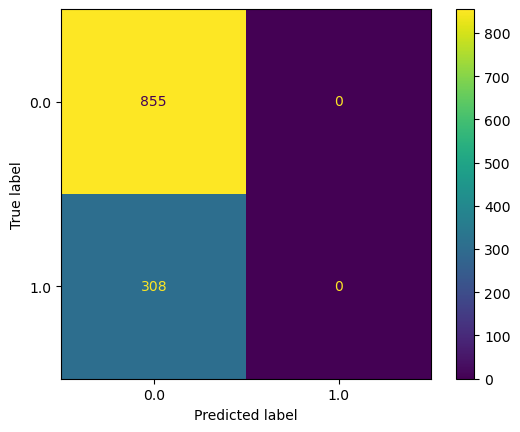

accuracy: 0.7351676698194325
precision: Nan
recall: 0.0
specificity: 1.0


In [710]:
plotConfusionMatrix(cm, dummy_clf)

We see the dummy baseline model classify all samples as failures, its accuracy is the same as the the ratio of failue in the test data

## Problem 8: A Simple Model

Use Logistic Regression to build a basic model on your data.  

In [716]:
start_time = time.time()
lgr1 = LogisticRegression(max_iter=1000).fit(X1_train, y1_train)
end_time = time.time()
training_time = end_time - start_time
print(f"Training time: {training_time:.4f} seconds")

Training time: 0.6554 seconds


/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [718]:
accuracy_score(y1_train, lgr1.predict(X1_train))

0.825738033820579

In [720]:
accuracy_score(y1_test, lgr1.predict(X1_test))

0.8306104901117799

In [724]:
lgr1.coef_

array([[ 0.09040205, -0.48525565, -0.56562388, -0.27973133, -0.1190415 ,
         0.23376726, -0.37056554, -0.28582704,  0.41091517,  0.10729123,
         0.35841216, -0.35439756, -0.26174511, -0.28911442, -0.21413099,
        -0.15045055, -0.24231908, -0.18666885,  0.        , -0.05539666,
        -0.05629096, -0.01389295,  0.0084062 , -0.07862157, -0.30877893,
        -0.83552268,  0.09285605, -0.2634875 ,  0.38984495,  0.26650917,
         0.66940002, -1.00549483, -0.83739393,  0.40280752,  0.21522416,
        -0.31383214, -0.33039986, -0.10731426, -0.11779521, -0.03591562,
         0.84232255,  0.0108311 ,  0.00408762, -0.1086237 , -0.00120875,
         0.11392651]])

In [726]:
# sorted(zip(lgr.coef_, X_test.columns.tolist()), reverse=True)
sorted(list(zip(lgr1.coef_[0], X1_test.columns.tolist())), reverse=True)

[(0.8423225518233809, 'poutcome_success'),
 (0.6694000231823048, 'month_mar'),
 (0.41091517076758294, 'job_student'),
 (0.40280751850332613, 'month_oct'),
 (0.38984494728951224, 'month_jul'),
 (0.35841215546095584, 'job_unemployed'),
 (0.2665091665747133, 'month_jun'),
 (0.23376725567508874, 'job_retired'),
 (0.21522416282710435, 'month_sep'),
 (0.11392651200705277, 'previous'),
 (0.10729122758471349, 'job_technician'),
 (0.09285604609081657, 'month_aug'),
 (0.09040204891308412, 'job_admin.'),
 (0.010831095775292012, 'age'),
 (0.008406200651985945, 'housing_yes'),
 (0.004087622825210984, 'duration'),
 (0.0, 'education_illiterate'),
 (-0.0012087455387470591, 'pdays'),
 (-0.013892952235169119, 'default_yes'),
 (-0.035915623706278516, 'day_of_week_wed'),
 (-0.05539666127669945, 'education_professional.course'),
 (-0.056290958500016954, 'education_university.degree'),
 (-0.07862156611898734, 'loan_yes'),
 (-0.10731425538860531, 'day_of_week_thu'),
 (-0.10862370472448511, 'campaign'),
 (-0.

## Problem 9: Score the Model

What is the accuracy of your model?

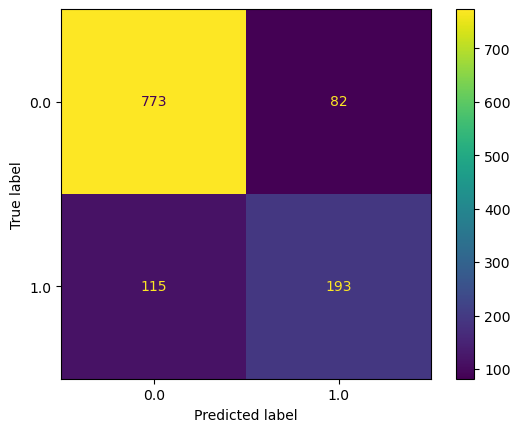

accuracy: 0.8306104901117799
precision: 0.7018181818181818
recall: 0.6266233766233766
specificity: 0.904093567251462


In [731]:
cm = confusion_matrix(y1_test, lgr1.predict(X1_test))
plotConfusionMatrix(cm, lgr1)

The accuracy is 0.8306

## Problem 10: Model Comparisons

Now, we aim to compare the performance of the Logistic Regression model to our KNN algorithm, Decision Tree, and SVM models.  Using the default settings for each of the models, fit and score each.  Also, be sure to compare the fit time of each of the models.  Present your findings in a `DataFrame` similar to that below:

| Model | Train Time | Train Accuracy | Test Accuracy |
| ----- | ---------- | -------------  | -----------   |
|     |    |.     |.     |

In [736]:
data = {
    'Model':['LogisticRegression', 'SVM', 'DecisionTree', 'KNN'],
    'Train Time	': [0.4923, 0.1498, 0.0238, 0.0087],
    'Train Accuracy': [0.825738033820579, 0.8308971051877329, 1.0, 0.8475207795930066],
    'Test Accuracy': [0.8306104901117799, 0.8486672398968186, 0.7833190025795357, 0.7987962166809974]
}
# index_labels = ['LogisticRegression', 'SVM', 'DecisionTree-6', 'KNN-7']
pd.DataFrame(data)

,Model,Train Time\t,Train Accuracy,Test Accuracy
0,LogisticRegression,0.4923,0.825738,0.830610
1,SVM,0.1498,0.830897,0.848667
2,DecisionTree,0.0238,1.000000,0.783319
3,KNN,0.0087,0.847521,0.798796


### SVM

In [740]:
start_time = time.time()
svc1 = SVC().fit(X1_train, y1_train)
end_time = time.time()
training_time = end_time - start_time
print(f"Training time: {training_time:.4f} seconds")
print(svc1.score(X1_test, y1_test))

Training time: 0.1465 seconds
0.8486672398968186


In [742]:
accuracy_score(y1_train, svc1.predict(X1_train))

0.8308971051877329

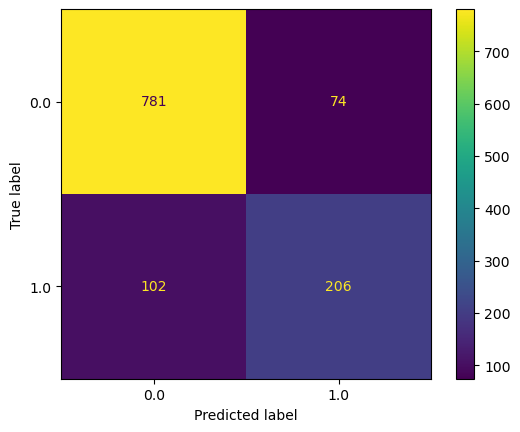

accuracy: 0.8486672398968186
precision: 0.7357142857142858
recall: 0.6688311688311688
specificity: 0.9134502923976608


In [744]:
cm = confusion_matrix(y1_test, svc1.predict(X1_test))
plotConfusionMatrix(cm, svc1)

### DecisionTree

In [748]:
start_time = time.time()
dtc1 = DecisionTreeClassifier().fit(X1_train, y1_train)
end_time = time.time()
training_time = end_time - start_time
print(f"Training time: {training_time:.4f} seconds")

Training time: 0.0242 seconds


In [750]:
accuracy_score(y1_train, dtc1.predict(X1_train))

1.0

In [752]:
accuracy_score(y1_test, dtc1.predict(X1_test))

0.7807394668959587

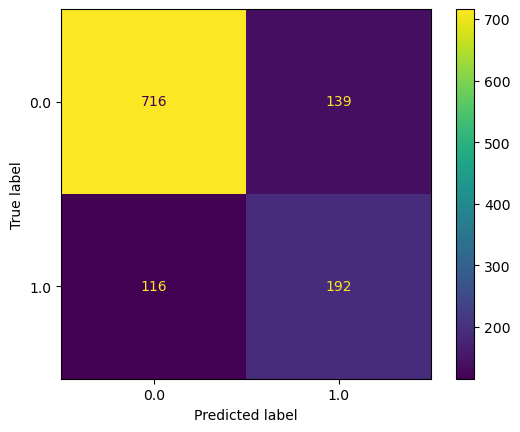

accuracy: 0.7807394668959587
precision: 0.5800604229607251
recall: 0.6233766233766234
specificity: 0.8374269005847953


In [754]:
cm = confusion_matrix(y1_test, dtc1.predict(X1_test))
plotConfusionMatrix(cm, dtc1)

#### check tree depth

In [758]:
dtc1.tree_.max_depth

24

#### check feature importantance

In [761]:
sorted(zip(dtc1.feature_importances_, X1_test.columns.tolist()), reverse=True)

[(0.27948909947864514, 'pdays'),
 (0.2620672079811512, 'duration'),
 (0.08328938325843493, 'age'),
 (0.03125090154270106, 'campaign'),
 (0.020211369718200593, 'month_may'),
 (0.019185931095539913, 'month_apr'),
 (0.018350953573197448, 'housing_yes'),
 (0.018192197433616174, 'day_of_week_tue'),
 (0.017871164883752125, 'previous'),
 (0.014223582204978859, 'day_of_week_thu'),
 (0.01292635687720268, 'job_technician'),
 (0.012676754520895764, 'day_of_week_wed'),
 (0.012617401918544402, 'job_admin.'),
 (0.011865214846992635, 'month_nov'),
 (0.011589459351715242, 'education_professional.course'),
 (0.011561713806026747, 'day_of_week_mon'),
 (0.010954086751993351, 'marital_married'),
 (0.010860283078111784, 'day_of_week_fri'),
 (0.010429547340351612, 'month_jun'),
 (0.009430139746392124, 'marital_single'),
 (0.00938145605570782, 'loan_yes'),
 (0.009362238262957881, 'education_university.degree'),
 (0.009214580096047684, 'month_oct'),
 (0.008763183441180388, 'education_high.school'),
 (0.007431

### KNN

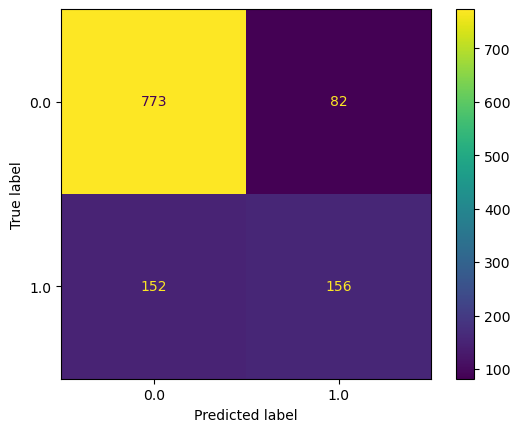

accuracy: 0.7987962166809974
precision: 0.6554621848739496
recall: 0.5064935064935064
specificity: 0.904093567251462


In [766]:
cm = confusion_matrix(y1_test, pipeKnn1.predict(X1_test))
plotConfusionMatrix(cm, pipeKnn1)

In [768]:
pipeKnn1 = Pipeline([('transform', StandardScaler()), ('knn', KNeighborsClassifier())])
start_time = time.time()
pipeKnn1.fit(X1_train, y1_train)
end_time = time.time()
training_time = end_time - start_time
print(f"Training time: {training_time:.4f} seconds")
pipeKnn1_acc = pipeKnn1.score(X1_test, y1_test)
pipeKnn1_acc

Training time: 0.0113 seconds


0.7987962166809974

In [770]:
pipeKnn1.score(X1_train, y1_train)

0.8475207795930066

## Problem 11: Improving the Model

Now that we have some basic models on the board, we want to try to improve these.  Below, we list a few things to explore in this pursuit.

- More feature engineering and exploration.  For example, should we keep the gender feature?  Why or why not?
- Hyperparameter tuning and grid search.  All of our models have additional hyperparameters to tune and explore.  For example the number of neighbors in KNN or the maximum depth of a Decision Tree.  
- Adjust your performance metric

#### Note!!! There is no gender feature in the dataset

#### Let's me first try tuning the hyperparameters and grid search

I think we should use a different performance metric which focus more on recall and specificity, also with recall being given higher weigh than specificity. Each FalseNegative sample means we lose the opportunity to contact and convince the customer to participate in the campaign. Slightly lower specificity is okay as long as the resource put in to contact each False Positive customer isn't very high.

LogisticRegression is tuned by grid searching on parameter C/regularization, SVM is tuned by grid searching on gama, DecisionTree is tuned by grid searching on max-depth, KNN is tuned by grid searching on n_neighbors.

The following is the table of test result. LogistcRegression and DecisionTree(max_depth == 6) are both quite good.

In [781]:
data = {
    'accuracy':[0.8435081685296647, 0.8572656921754084, 0.8529664660361135, 0.8030954428202923],
    'precision': [0.7128378378378378, 0.762962962962963, 0.7353951890034365, 0.6652719665271967],
    'recall': [0.685064935064935, 0.6688311688311688, 0.6948051948051948, 0.5162337662337663],
    'specificity': [0.9005847953216374, 0.9251461988304094, 0.9099415204678363, 0.9064327485380117]
}
index_labels = ['LogisticRegression', 'SVM', 'DecisionTree-6', 'KNN-7']
pd.DataFrame(data, index = index_labels)

,accuracy,precision,recall,specificity
LogisticRegression,0.843508,0.712838,0.685065,0.900585
SVM,0.857266,0.762963,0.668831,0.925146
DecisionTree-6,0.852966,0.735395,0.694805,0.909942
KNN-7,0.803095,0.665272,0.516234,0.906433


In [785]:
df2 = removeUnknown(df0)
df2 = featureEncoding(df2)
y2 = df2['y_yes']
df2 = df2.drop(columns =['y_yes'])
df2

,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,marital_divorced,marital_married,marital_single,education_basic.4y,education_basic.6y,education_basic.9y,education_high.school,education_illiterate,education_professional.course,education_university.degree,default_yes,housing_yes,loan_yes,contact_telephone,month_apr,month_aug,month_dec,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_success,age,duration,campaign,pdays,previous
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,40.0,144.0,1.0,999.0,1.0
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,36.0,449.0,1.0,999.0,1.0
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,36.0,114.0,1.0,999.0,1.0
3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,37.0,119.0,1.0,6.0,1.0
4,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,29.0,86.0,1.0,999.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4647,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,62.0,329.0,1.0,999.0,2.0
4648,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,62.0,208.0,1.0,1.0,6.0
4649,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,62.0,483.0,2.0,6.0,3.0
4650,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,29.0,112.0,1.0,9.0,1.0


In [787]:
X2_train, X2_test, y2_train, y2_test = train_test_split(df2, y2, random_state=42)

### LogisticRegression

In [791]:
param_grid = {
    'C': np.logspace(-4, 0, 50),
    'solver': ['liblinear', 'lbfgs']
}


In [806]:
grid_lgr2 = GridSearchCV(
    estimator=LogisticRegression(max_iter=1000),
    param_grid=param_grid
)
grid_lgr2.fit(X2_train, y2_train)
print(grid_lgr2.score(X2_test, y2_test))
print(grid_lgr2.best_estimator_)
print(grid_lgr2.best_params_['solver'])

/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_ite

0.8435081685296647
LogisticRegression(C=0.010985411419875584, max_iter=1000)
lbfgs


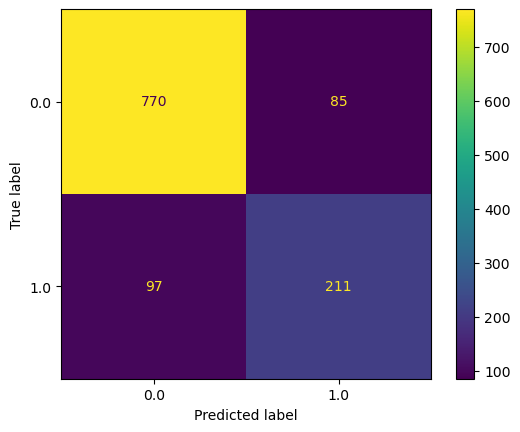

accuracy: 0.8435081685296647
precision: 0.7128378378378378
recall: 0.685064935064935
specificity: 0.9005847953216374


In [810]:
cm = confusion_matrix(y2_test, grid_lgr2.predict(X2_test))
plotConfusionMatrix(cm, grid_lgr2)

### SVM

In [815]:
params = {'kernel': ['rbf'],
         'gamma': np.logspace(-8, -4, 100),}
grid_svc2 = GridSearchCV(SVC(), params).fit(X2_train, y2_train)
print(grid_svc2.score(X2_test, y2_test))
print(grid_svc2.best_estimator_)
print(grid_svc2.best_params_['kernel'])

0.8572656921754084
SVC(gamma=1.519911082952933e-06)
rbf


In [816]:
svc2 = SVC(kernel='rbf', gamma=1.519911082952933e-06).fit(X2_train, y2_train)
svc2.score(X2_test, y2_test)

0.8572656921754084

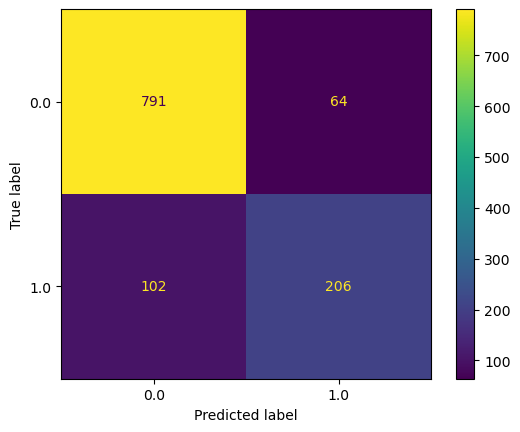

accuracy: 0.8572656921754084
precision: 0.762962962962963
recall: 0.6688311688311688
specificity: 0.9251461988304094


In [819]:
cm = confusion_matrix(y2_test, svc2.predict(X2_test))
plotConfusionMatrix(cm, svc2)

### DecisioinTree

In [824]:
accu = []
for i in range(2, 21):
    dtci = DecisionTreeClassifier(max_depth = i).fit(X2_train, y2_train)
    dtci_preds = dtci.predict(X2_test)
    accu.append(("maxDepth:", i, "accuracy:", accuracy_score(y2_test, dtci_preds)))

accu

[('maxDepth:', 2, 'accuracy:', 0.8495270851246776),
 ('maxDepth:', 3, 'accuracy:', 0.8512467755803955),
 ('maxDepth:', 4, 'accuracy:', 0.8529664660361135),
 ('maxDepth:', 5, 'accuracy:', 0.8374892519346517),
 ('maxDepth:', 6, 'accuracy:', 0.8460877042132416),
 ('maxDepth:', 7, 'accuracy:', 0.8340498710232158),
 ('maxDepth:', 8, 'accuracy:', 0.8340498710232158),
 ('maxDepth:', 9, 'accuracy:', 0.825451418744626),
 ('maxDepth:', 10, 'accuracy:', 0.8177128116938951),
 ('maxDepth:', 11, 'accuracy:', 0.8099742046431643),
 ('maxDepth:', 12, 'accuracy:', 0.8048151332760103),
 ('maxDepth:', 13, 'accuracy:', 0.8073946689595872),
 ('maxDepth:', 14, 'accuracy:', 0.7979363714531384),
 ('maxDepth:', 15, 'accuracy:', 0.8022355975924333),
 ('maxDepth:', 16, 'accuracy:', 0.7927773000859846),
 ('maxDepth:', 17, 'accuracy:', 0.7919174548581256),
 ('maxDepth:', 18, 'accuracy:', 0.7858985382631126),
 ('maxDepth:', 19, 'accuracy:', 0.7867583834909716),
 ('maxDepth:', 20, 'accuracy:', 0.7764402407566638)]

In [827]:
dtc4 = DecisionTreeClassifier(max_depth = 4).fit(X2_train, y2_train)
dtc4.score(X2_test, y2_test)

0.8529664660361135

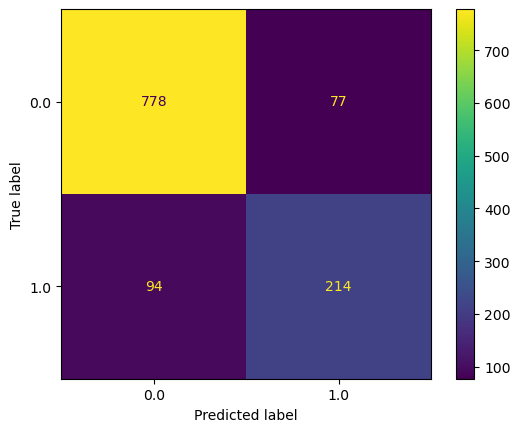

accuracy: 0.8529664660361135
precision: 0.7353951890034365
recall: 0.6948051948051948
specificity: 0.9099415204678363


In [829]:
cm = confusion_matrix(y2_test, dtc4.predict(X2_test))
plotConfusionMatrix(cm, dtc4)

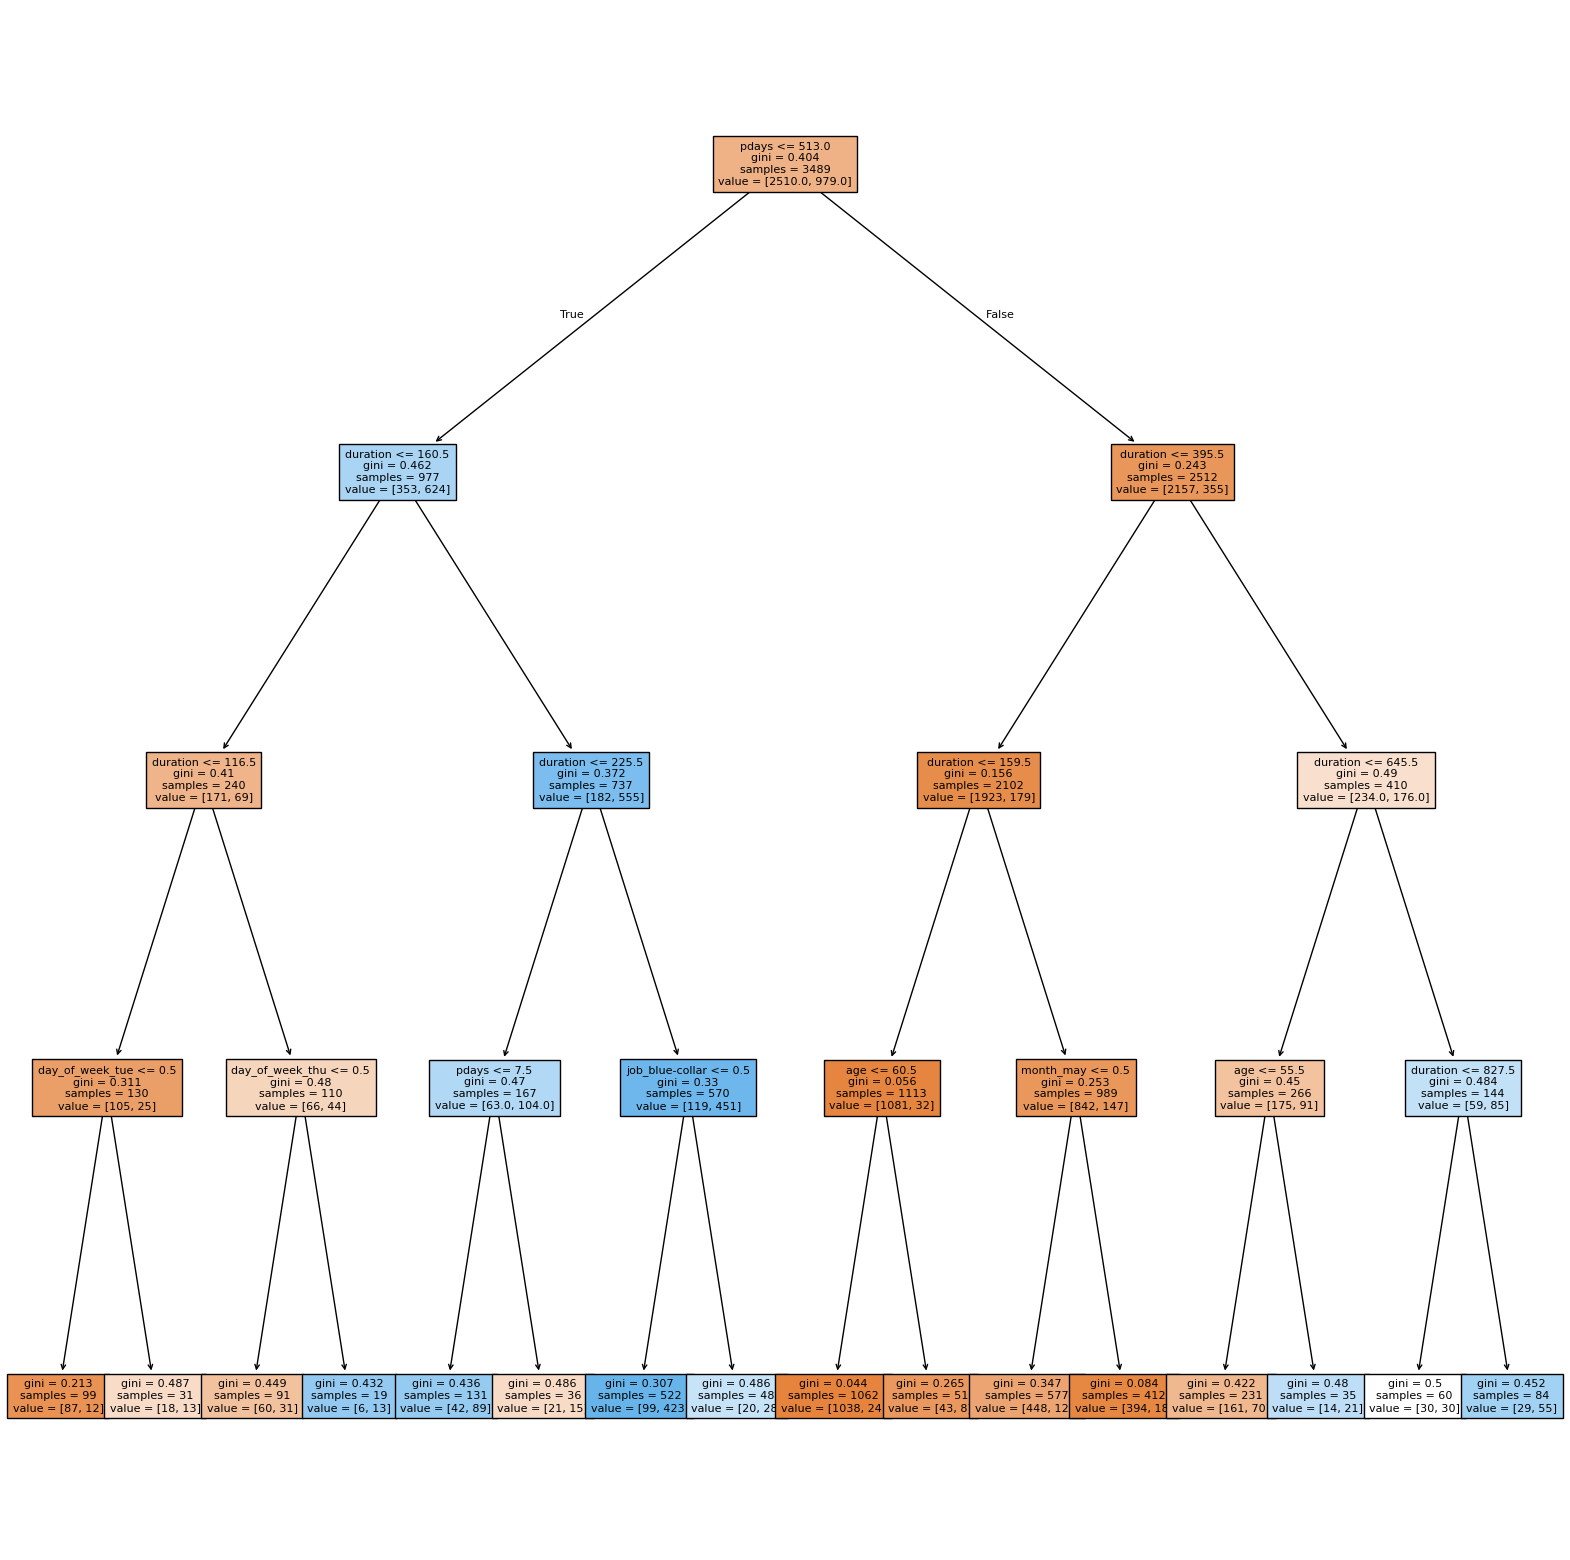

In [832]:
fig, ax = plt.subplots(figsize = (20, 20))
plot_tree(dtc4, feature_names=list(X2_train.columns), filled=True, ax = ax, fontsize=8);

In [835]:
dtc6 = DecisionTreeClassifier(max_depth = 6).fit(X2_train, y2_train)
dtc6.score(X2_test, y2_test)

0.8409286328460877

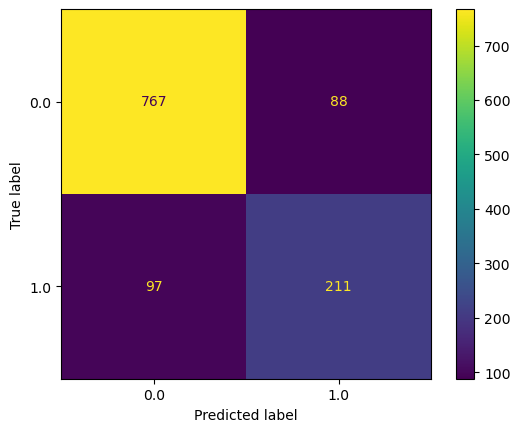

accuracy: 0.8409286328460877
precision: 0.705685618729097
recall: 0.685064935064935
specificity: 0.8970760233918129


In [837]:
cm = confusion_matrix(y2_test, dtc6.predict(X2_test))
plotConfusionMatrix(cm, dtc6)

In [840]:
dtc8 = DecisionTreeClassifier(max_depth = 8).fit(X2_train, y2_train)
dtc8.score(X2_test, y2_test)

0.8366294067067928

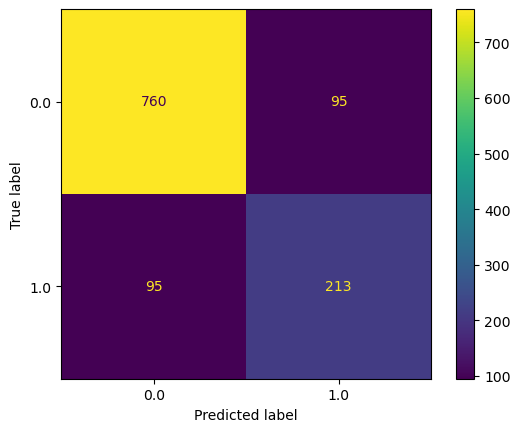

accuracy: 0.8366294067067928
precision: 0.6915584415584416
recall: 0.6915584415584416
specificity: 0.8888888888888888


In [842]:
cm = confusion_matrix(y2_test, dtc8.predict(X2_test))
plotConfusionMatrix(cm, dtc8)

### KNN

In [847]:
accu = []
for i in range(3, 21):
    pipe_i = Pipeline([('transform', StandardScaler()), ('knn', KNeighborsClassifier(i))])
    pipe_i.fit(X2_train, y2_train)
    accu.append(("n_neighbors:", i, "accuracy:", pipe_i.score(X2_test, y2_test)))
accu

[('n_neighbors:', 3, 'accuracy:', 0.7893379191745485),
 ('n_neighbors:', 4, 'accuracy:', 0.7927773000859846),
 ('n_neighbors:', 5, 'accuracy:', 0.7987962166809974),
 ('n_neighbors:', 6, 'accuracy:', 0.7884780739466896),
 ('n_neighbors:', 7, 'accuracy:', 0.8030954428202923),
 ('n_neighbors:', 8, 'accuracy:', 0.7850386930352536),
 ('n_neighbors:', 9, 'accuracy:', 0.7910576096302665),
 ('n_neighbors:', 10, 'accuracy:', 0.7893379191745485),
 ('n_neighbors:', 11, 'accuracy:', 0.7953568357695615),
 ('n_neighbors:', 12, 'accuracy:', 0.7850386930352536),
 ('n_neighbors:', 13, 'accuracy:', 0.7893379191745485),
 ('n_neighbors:', 14, 'accuracy:', 0.7833190025795357),
 ('n_neighbors:', 15, 'accuracy:', 0.7910576096302665),
 ('n_neighbors:', 16, 'accuracy:', 0.7927773000859846),
 ('n_neighbors:', 17, 'accuracy:', 0.8039552880481513),
 ('n_neighbors:', 18, 'accuracy:', 0.7953568357695615),
 ('n_neighbors:', 19, 'accuracy:', 0.7970765262252795),
 ('n_neighbors:', 20, 'accuracy:', 0.7858985382631126)]

In [850]:
pipeKnn2 = Pipeline([('transform', StandardScaler()), ('knn', KNeighborsClassifier(7))])
pipeKnn2.fit(X2_train, y2_train)
pipeKnn2.score(X2_test, y2_test)

0.8030954428202923

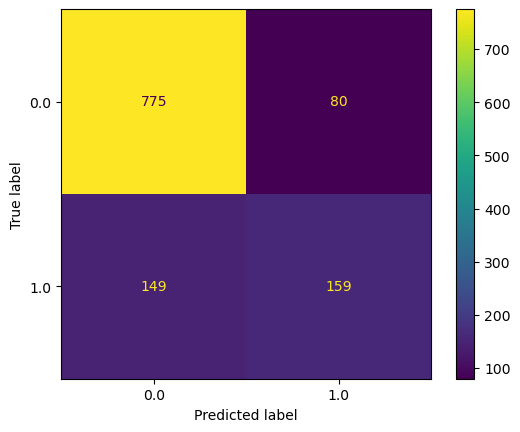

accuracy: 0.8030954428202923
precision: 0.6652719665271967
recall: 0.5162337662337663
specificity: 0.9064327485380117


In [852]:
cm = confusion_matrix(y2_test, pipeKnn2.predict(X2_test))
plotConfusionMatrix(cm, pipeKnn2)

In [855]:
pipeKnn2 = Pipeline([('transform', StandardScaler()), ('knn', KNeighborsClassifier(17))])
pipeKnn2.fit(X2_train, y2_train)
pipeKnn2.score(X2_test, y2_test)

0.8039552880481513

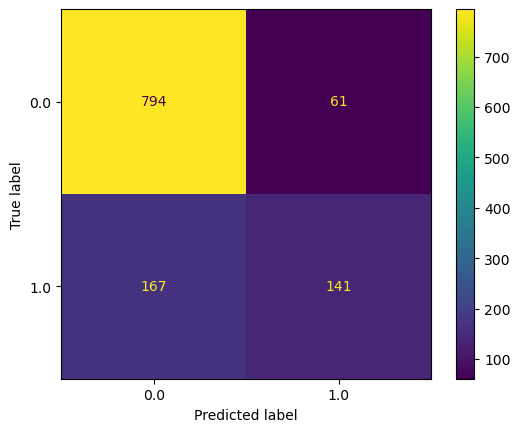

accuracy: 0.8039552880481513
precision: 0.698019801980198
recall: 0.4577922077922078
specificity: 0.928654970760234


In [857]:
cm = confusion_matrix(y2_test, pipeKnn2.predict(X2_test))
plotConfusionMatrix(cm, pipeKnn2)

## 12: Further Improvement
### Use predict_proba of the classifier and custom threshold to tune the confusion matrix

#### I would use a custom threshold of 0.3 to improve recall because each False Negative would likely cost us a campaign success

DecisionTree (mat-depth == 6) ends up to be the best model with this approach, with recall of 0.8344 and specificity of 0.8234, LogisticRegresion is not far behind

In [865]:
data = {
    'accuracy':[0.8185726569217541, 0.8452278589853827, 0.826311263972485, 0.7953568357695615],
    'precision': [0.6234096692111959, 0.7038216560509554, 0.6299019607843137,0.5988700564971752],
    'recall': [0.7954545454545454, 0.7175324675324676, 0.8344155844155844, 0.6883116883116883],
    'specificity': [0.8269005847953217, 0.8912280701754386, 0.8233918128654971, 0.8339181286549707]
}
index_labels = ['LogisticRegression', 'SVM', 'DecisionTree-6', 'KNN-15']
pd.DataFrame(data, index = index_labels)

,accuracy,precision,recall,specificity
LogisticRegression,0.818573,0.623410,0.795455,0.826901
SVM,0.845228,0.703822,0.717532,0.891228
DecisionTree-6,0.826311,0.629902,0.834416,0.823392
KNN-15,0.795357,0.598870,0.688312,0.833918


#### define a custome threshould predict function

In [870]:
def custom_predict(model, X, threshold):
    probs = model.predict_proba(X) 
    return (probs[:, 1] > threshold).astype(int)
    

#### LogisticRegression with custom threshold

In [874]:
lgr2 = LogisticRegression(C=0.010985411419875584, max_iter=1000).fit(X2_train, y2_train)
lgr2_03_preds = custom_predict(lgr2, X2_test, threshold=0.3)

In [875]:
lgr2_03_preds

array([1, 0, 0, ..., 0, 1, 0])

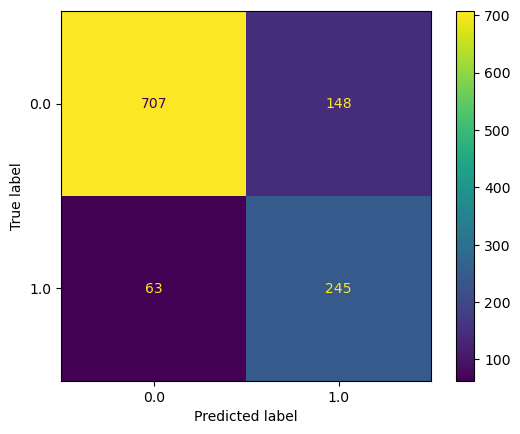

accuracy: 0.8185726569217541
precision: 0.6234096692111959
recall: 0.7954545454545454
specificity: 0.8269005847953217


In [876]:
cm = confusion_matrix(y2_test, lgr2_03_preds)
plotConfusionMatrix(cm, lgr2)

In [879]:
cm

array([[707, 148],
       [ 63, 245]])

#### SVM with custom threshold

In [885]:
svc2 = SVC(kernel='rbf', probability=True, gamma=1.519911082952933e-06).fit(X2_train, y2_train)

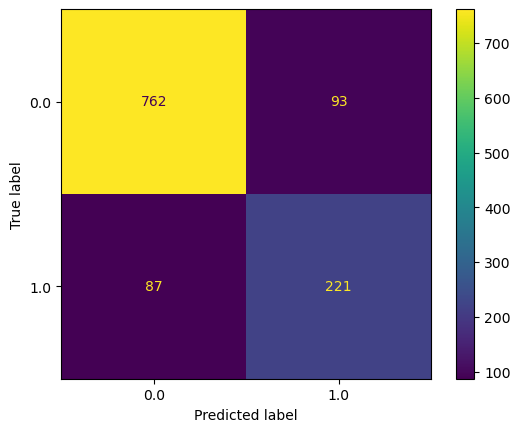

accuracy: 0.8452278589853827
precision: 0.7038216560509554
recall: 0.7175324675324676
specificity: 0.8912280701754386


In [886]:
svc2_03_preds = custom_predict(svc2, X2_test, threshold=0.3)
cm = confusion_matrix(y2_test, svc2_03_preds)
plotConfusionMatrix(cm, svc2)

#### DecisionTree with custom threshold

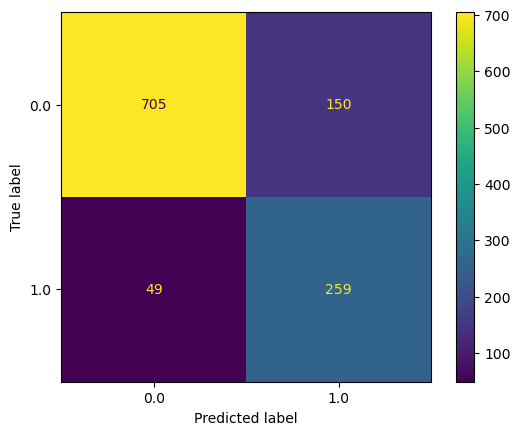

accuracy: 0.8288907996560619
precision: 0.6332518337408313
recall: 0.8409090909090909
specificity: 0.8245614035087719


In [889]:
dtc6 = DecisionTreeClassifier(max_depth = 6).fit(X2_train, y2_train)
dtc6_03_preds = custom_predict(dtc6, X2_test, threshold=0.3)
cm = confusion_matrix(y2_test, dtc6_03_preds)
plotConfusionMatrix(cm, dtc6)

#### KNN with custom threshold

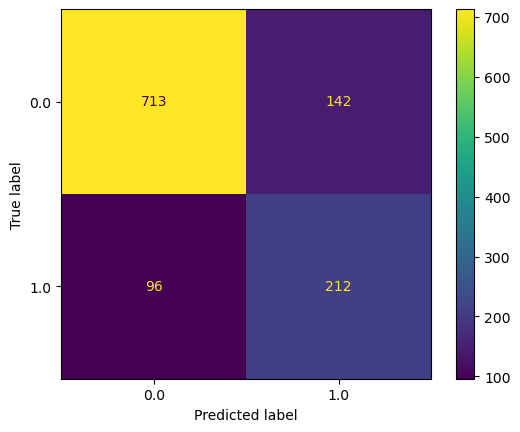

accuracy: 0.7953568357695615
precision: 0.5988700564971752
recall: 0.6883116883116883
specificity: 0.8339181286549707


In [895]:
pipeKnn2 = Pipeline([('transform', StandardScaler()), ('knn', KNeighborsClassifier(7))])
pipeKnn2.fit(X2_train, y2_train)
pipeKnn2_03_preds = custom_predict(pipeKnn2, X2_test, threshold=0.3)
cm = confusion_matrix(y2_test, pipeKnn2_03_preds)
plotConfusionMatrix(cm, pipeKnn2)

In [898]:
# lgr2 = LogisticRegression(C=0.010985411419875584, max_iter=1000).fit(X2_train, y2_train)
# lgr2_03_preds = custom_predict(lgr2, X2_test, threshold=0.3)

## 13: Another thought, simply the model by removing some features
#### Try removing features month, day_of_week, job, education and martial

These categorical features end up with more than 30 features after OneHot encoding, removing them leave us with a much smaller table, here I also use a custom threshold of 0.3 to improve recall.

The results in general are not as good as the ones with full features, though not far behind. DecisionTree and LogisticRegression still do reasonably well.

In [905]:
data = {
    'accuracy':[0.8099742046431643, 0.8452278589853827, 0.8159931212381771, 0.7841788478073947],
    'precision': [0.6090225563909775, 0.7038216560509554, 0.6180904522613065, 0.5664335664335665],
    'recall': [0.788961038961039, 0.7175324675324676, 0.7987012987012987, 0.788961038961039],
    'specificity': [0.8175438596491228, 0.8912280701754386, 0.8222222222222222, 0.7824561403508772]
}
index_labels = ['LogisticRegression', 'SVM', 'DecisionTree-6', 'KNN-15']
pd.DataFrame(data, index = index_labels)

,accuracy,precision,recall,specificity
LogisticRegression,0.809974,0.609023,0.788961,0.817544
SVM,0.845228,0.703822,0.717532,0.891228
DecisionTree-6,0.815993,0.618090,0.798701,0.822222
KNN-15,0.784179,0.566434,0.788961,0.782456


In [908]:
# data = {'col1': [1, 2], 'col2': [3, 4]}
# index_labels = ['row1', 'row2']

# df = pd.DataFrame(data, index=index_labels)

The purpose of removing these categorial features is to create a simpler model and possibility reduce overfitting.

In [912]:
df3 = removeUnknown(df0)

In [914]:
df3 = df3.drop(columns = ['month', 'day_of_week', 'job', 'marital', 'education'])

In [916]:
df3 = featureEncoding(df3)

In [918]:
y3 = df3['y_yes']
df3 = df3.drop(columns =['y_yes'])
df3

,default_yes,housing_yes,loan_yes,contact_telephone,poutcome_success,age,duration,campaign,pdays,previous
0,0.0,1.0,0.0,1.0,0.0,40.0,144.0,1.0,999.0,1.0
1,0.0,1.0,0.0,1.0,0.0,36.0,449.0,1.0,999.0,1.0
2,0.0,1.0,0.0,1.0,0.0,36.0,114.0,1.0,999.0,1.0
3,0.0,1.0,0.0,1.0,1.0,37.0,119.0,1.0,6.0,1.0
4,0.0,1.0,0.0,1.0,0.0,29.0,86.0,1.0,999.0,1.0
...,...,...,...,...,...,...,...,...,...,...
4647,0.0,1.0,0.0,0.0,0.0,62.0,329.0,1.0,999.0,2.0
4648,0.0,1.0,0.0,0.0,1.0,62.0,208.0,1.0,1.0,6.0
4649,0.0,0.0,0.0,0.0,1.0,62.0,483.0,2.0,6.0,3.0
4650,0.0,1.0,0.0,0.0,1.0,29.0,112.0,1.0,9.0,1.0


In [921]:
X3_train, X3_test, y3_train, y3_test = train_test_split(df3, y3, random_state=42)

#### LogisticRegression

In [925]:
param_grid = {
    'C': np.logspace(-7, -3, 50)
}
grid_lgr3 = GridSearchCV(
    estimator=LogisticRegression(max_iter=1000),
    param_grid=param_grid
)
grid_lgr3.fit(X3_train, y3_train)
print(grid_lgr3.score(X3_test, y3_test))
print(grid_lgr3.best_estimator_)

0.8435081685296647
LogisticRegression(C=5.179474679231212e-06, max_iter=1000)


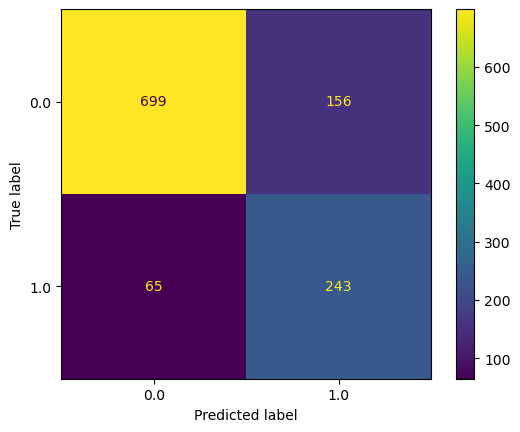

accuracy: 0.8099742046431643
precision: 0.6090225563909775
recall: 0.788961038961039
specificity: 0.8175438596491228


In [926]:
lgr3 = LogisticRegression(C=5.179474679231212e-06, max_iter=1000).fit(X3_train, y3_train)
lgr3_03_preds = custom_predict(lgr3, X3_test, threshold=0.3)
cm = confusion_matrix(y3_test, lgr3_03_preds)
plotConfusionMatrix(cm, lgr3)

#### SVM

In [929]:
params = {'kernel': ['rbf'],
         'gamma': np.logspace(-8, -4, 100),}
grid_svc3 = GridSearchCV(SVC(), params).fit(X3_train, y3_train)
print(grid_svc3.score(X3_test, y3_test))
print(grid_svc3.best_estimator_)
print(grid_svc3.best_params_['kernel'])

0.8572656921754084
SVC(gamma=1.519911082952933e-06)
rbf


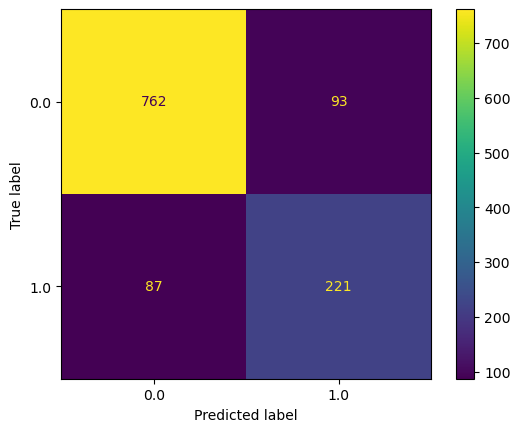

accuracy: 0.8452278589853827
precision: 0.7038216560509554
recall: 0.7175324675324676
specificity: 0.8912280701754386


In [930]:
svc3 = SVC(kernel='rbf', probability=True, gamma=1.519911082952933e-06).fit(X3_train, y3_train)
svc3_03_preds = custom_predict(svc3, X3_test, threshold=0.3)
cm = confusion_matrix(y3_test, svc3_03_preds)
plotConfusionMatrix(cm, svc3)

#### DecisionTree

In [934]:
accu = []
for i in range(2, 21):
    dtci = DecisionTreeClassifier(max_depth = i).fit(X3_train, y3_train)
    dtci_preds = dtci.predict(X3_test)
    accu.append(("maxDepth:", i, "accuracy:", accuracy_score(y3_test, dtci_preds)))

accu

[('maxDepth:', 2, 'accuracy:', 0.8495270851246776),
 ('maxDepth:', 3, 'accuracy:', 0.8512467755803955),
 ('maxDepth:', 4, 'accuracy:', 0.8521066208082545),
 ('maxDepth:', 5, 'accuracy:', 0.8452278589853827),
 ('maxDepth:', 6, 'accuracy:', 0.8512467755803955),
 ('maxDepth:', 7, 'accuracy:', 0.8409286328460877),
 ('maxDepth:', 8, 'accuracy:', 0.8306104901117799),
 ('maxDepth:', 9, 'accuracy:', 0.82201203783319),
 ('maxDepth:', 10, 'accuracy:', 0.8177128116938951),
 ('maxDepth:', 11, 'accuracy:', 0.8108340498710233),
 ('maxDepth:', 12, 'accuracy:', 0.8099742046431643),
 ('maxDepth:', 13, 'accuracy:', 0.8005159071367154),
 ('maxDepth:', 14, 'accuracy:', 0.7979363714531384),
 ('maxDepth:', 15, 'accuracy:', 0.8022355975924333),
 ('maxDepth:', 16, 'accuracy:', 0.7996560619088564),
 ('maxDepth:', 17, 'accuracy:', 0.7841788478073947),
 ('maxDepth:', 18, 'accuracy:', 0.7790197764402408),
 ('maxDepth:', 19, 'accuracy:', 0.7919174548581256),
 ('maxDepth:', 20, 'accuracy:', 0.7798796216680998)]

In [935]:
dtc6 = DecisionTreeClassifier(max_depth = 6).fit(X3_train, y3_train)

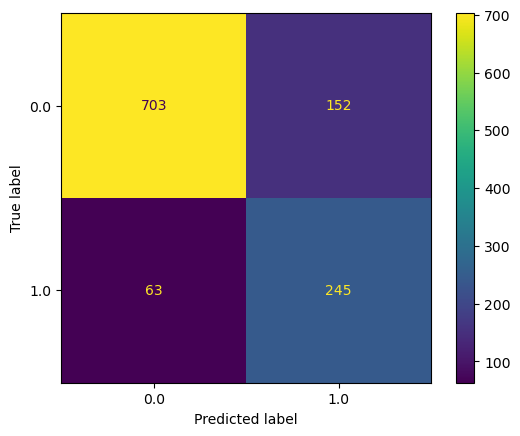

accuracy: 0.8151332760103182
precision: 0.6171284634760705
recall: 0.7954545454545454
specificity: 0.8222222222222222


In [936]:
dtc6_03_preds = custom_predict(dtc6, X3_test, threshold=0.3)
cm = confusion_matrix(y3_test, dtc6_03_preds)
plotConfusionMatrix(cm, dtc6)

#### KNN

In [940]:
accu = []
for i in range(3, 21):
    pipe_i = Pipeline([('transform', StandardScaler()), ('knn', KNeighborsClassifier(i))])
    pipe_i.fit(X3_train, y3_train)
    accu.append(("n_neighbors:", i, "accuracy:", pipe_i.score(X3_test, y3_test)))
accu

[('n_neighbors:', 3, 'accuracy:', 0.7773000859845228),
 ('n_neighbors:', 4, 'accuracy:', 0.7876182287188306),
 ('n_neighbors:', 5, 'accuracy:', 0.7936371453138436),
 ('n_neighbors:', 6, 'accuracy:', 0.7970765262252795),
 ('n_neighbors:', 7, 'accuracy:', 0.8056749785038693),
 ('n_neighbors:', 8, 'accuracy:', 0.8039552880481513),
 ('n_neighbors:', 9, 'accuracy:', 0.8099742046431643),
 ('n_neighbors:', 10, 'accuracy:', 0.8177128116938951),
 ('n_neighbors:', 11, 'accuracy:', 0.8185726569217541),
 ('n_neighbors:', 12, 'accuracy:', 0.819432502149613),
 ('n_neighbors:', 13, 'accuracy:', 0.82201203783319),
 ('n_neighbors:', 14, 'accuracy:', 0.821152192605331),
 ('n_neighbors:', 15, 'accuracy:', 0.825451418744626),
 ('n_neighbors:', 16, 'accuracy:', 0.8177128116938951),
 ('n_neighbors:', 17, 'accuracy:', 0.82201203783319),
 ('n_neighbors:', 18, 'accuracy:', 0.828030954428203),
 ('n_neighbors:', 19, 'accuracy:', 0.825451418744626),
 ('n_neighbors:', 20, 'accuracy:', 0.819432502149613)]

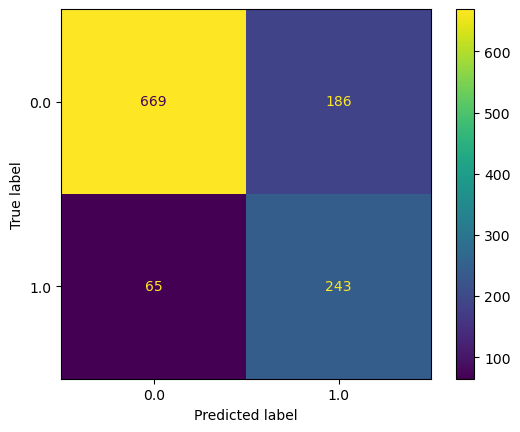

accuracy: 0.7841788478073947
precision: 0.5664335664335665
recall: 0.788961038961039
specificity: 0.7824561403508772


In [941]:
pipeKnn3 = Pipeline([('transform', StandardScaler()), ('knn', KNeighborsClassifier(15))])
pipeKnn3.fit(X3_train, y3_train)
pipeKnn3_03_preds = custom_predict(pipeKnn3, X3_test, threshold=0.3)
cm = confusion_matrix(y3_test, pipeKnn3_03_preds)
plotConfusionMatrix(cm, pipeKnn3)

##### Questions